In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as k
from keras.models import load_model 
from keras.preprocessing import image 
import numpy as np
from os import listdir 
from os.path import isfile, join 

In [ ]:
img_width = 150
img_height = 150

In [ ]:
train_data_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train"
validation_data_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation"
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

In [ ]:
if k.image_data_format() == "channels_first":
  input_shape=(3, img_height, img_width)
else:
  input_shape=(img_height, img_width, 3)

In [ ]:
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.5))
model.add(Dense(1))

In [ ]:
from tensorflow import keras 
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range= 0.2, horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="binary")

Found 198 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [ ]:
img, labels = next(train_generator)

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

image_batch, label_batch = train_generator.next()
print(len(image_batch))

20


1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0


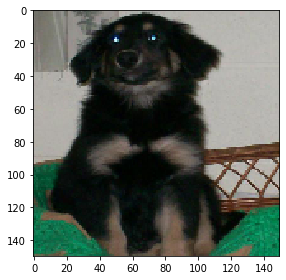

In [ ]:
for i in range(0, len(image_batch)):
  image = image_batch[i]
  print(label_batch[i])
  imshow(image)

In [ ]:
validation_generator = train_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode="binary")

Found 100 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_samples // batch_size)

Epoch 1/5
10/10 [==============================] - 102s 10s/step - loss: 2.3432 - accuracy: 0.4697 - val_loss: 0.7718 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 19s 2s/step - loss: 1.1588 - accuracy: 0.5253 - val_loss: 0.7473 - val_accuracy: 0.5500
Epoch 3/5
10/10 [==============================] - 15s 2s/step - loss: 0.8712 - accuracy: 0.5505 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 4/5
10/10 [==============================] - 10s 1s/step - loss: 0.8287 - accuracy: 0.5455 - val_loss: 0.6820 - val_accuracy: 0.5500
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 0.6600 - accuracy: 0.6364 - val_loss: 0.6300 - val_accuracy: 0.6000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


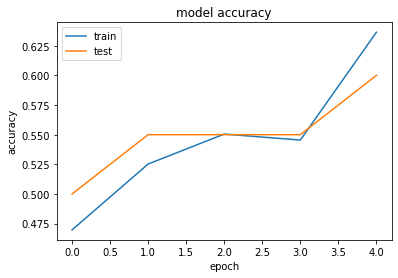

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

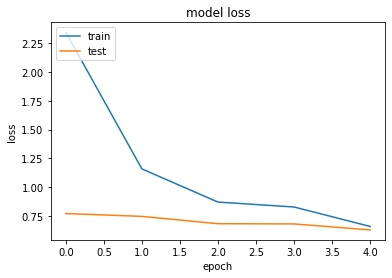

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()